# ONLINE SUPERSTORE

This dataset is one of the dataset that comes with Tableau Desktop. I've downloaded a version here: https://www.kaggle.com/jr2ngb/superstore-data.

Throughout this notebook, I'm going to explore all the features to understand what they represent.

In [1]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

First, let's read the dataset to see how many observations and features it  has:

In [2]:
data = pd.read_csv('data/superstore_dataset2011-2015.csv')
print(data.shape)
data.head()

(51290, 24)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High
3,11731,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High
4,22255,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium


## Understanding the features

The dataset has quite a number of object features:

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

The object columns are probably categorical, so let's see how many categories does each of them hold:

In [4]:
data.nunique()

Row ID            51290
Order ID          25035
Order Date         1430
Ship Date          1464
Ship Mode             4
Customer ID        1590
Customer Name       795
Segment               3
City               3636
State              1094
Country             147
Postal Code         631
Market                7
Region               13
Product ID        10292
Category              3
Sub-Category         17
Product Name       3788
Sales             22995
Quantity             14
Discount             27
Profit            24575
Shipping Cost     10037
Order Priority        4
dtype: int64

Just Row ID has a unique value for each row, but some of them have a long list of unique values, like Product ID, or Order ID

### Order ID
What's happening with Order ID? Shouldn't we have a unique value for each row? Let's group by Order ID, to locate an order repeated through multiple rows:

In [5]:
data.groupby('Order ID').nunique()['Row ID']

Order ID
AE-2011-9160    2
AE-2013-1130    2
AE-2013-1530    2
AE-2014-2840    1
AE-2014-3830    6
               ..
ZI-2014-7160    3
ZI-2014-7610    2
ZI-2014-9540    1
ZI-2014-9550    2
ZI-2014-9650    1
Name: Row ID, Length: 25035, dtype: int64

The order "AE-2014-3830" repeats through 6 rows. I'm going to isolate those rows to see what is happening:

In [6]:
data[data['Order ID'] == 'AE-2014-3830']

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
21825,43926,AE-2014-3830,13-12-2014,19-12-2014,Standard Class,GH-4665,Greg Hansen,Consumer,Ras al Khaymah,Ra's Al Khaymah,...,TEC-MOT-10001535,Technology,Phones,"Motorola Headset, VoIP",95.796,4,0.7,-156.564,6.73,Medium
21830,43924,AE-2014-3830,13-12-2014,19-12-2014,Standard Class,GH-4665,Greg Hansen,Consumer,Ras al Khaymah,Ra's Al Khaymah,...,OFF-ELD-10002297,Office Supplies,Storage,"Eldon Lockers, Blue",59.373,1,0.7,-118.767,5.83,Medium
21834,43922,AE-2014-3830,13-12-2014,19-12-2014,Standard Class,GH-4665,Greg Hansen,Consumer,Ras al Khaymah,Ra's Al Khaymah,...,OFF-BIC-10002270,Office Supplies,Art,"BIC Pencil Sharpener, Water Color",77.256,8,0.7,-82.584,4.08,Medium
21838,43925,AE-2014-3830,13-12-2014,19-12-2014,Standard Class,GH-4665,Greg Hansen,Consumer,Ras al Khaymah,Ra's Al Khaymah,...,OFF-ROG-10003993,Office Supplies,Storage,"Rogers File Cart, Single Width",42.489,1,0.7,-62.331,2.24,Medium
21848,43923,AE-2014-3830,13-12-2014,19-12-2014,Standard Class,GH-4665,Greg Hansen,Consumer,Ras al Khaymah,Ra's Al Khaymah,...,OFF-AVE-10000357,Office Supplies,Binders,"Avery Binder Covers, Clear",3.159,1,0.7,-4.971,0.25,Medium
21849,43927,AE-2014-3830,13-12-2014,19-12-2014,Standard Class,GH-4665,Greg Hansen,Consumer,Ras al Khaymah,Ra's Al Khaymah,...,OFF-AVE-10004827,Office Supplies,Binders,"Avery Binder Covers, Recycled",3.429,1,0.7,-3.891,0.25,Medium


Oh, ok: there is a row for each product purchased within the same order.

### Order Date and Ship Date

I want to know what is the range of dates for this two columns. First, I'm going to see what does Order Date contains:

In [7]:
data['Order Date']

0          1/1/2011
1          1/1/2011
2          1/1/2011
3          1/1/2011
4          1/1/2011
            ...    
51285    31-12-2014
51286    31-12-2014
51287    31-12-2014
51288    31-12-2014
51289    31-12-2014
Name: Order Date, Length: 51290, dtype: object

In [8]:
data['Order Date'].sample(10)

9702       5/7/2013
48493    29-10-2014
20559    13-06-2012
1584       6/6/2011
11349      9/3/2013
35454    22-01-2013
496        2/8/2011
44433    27-06-2011
46204    28-05-2014
14394      3/6/2014
Name: Order Date, dtype: object

Uf, the dates have different formats! This must be cleaned first.

For what I see, the XX-XX-XXXX format is day-month-year, and the XX/XX/XXXX is day-month-year, too.

To unify the format, it should be enought to converting the dates into datetime objects. Let's check it:

In [9]:
all_order_dates = pd.Series(pd.to_datetime(data['Order Date']))
last_in_df_day = all_order_dates.iloc[-1].day
last_in_df_month = all_order_dates.iloc[-1].month
last_in_df_year = all_order_dates.iloc[-1].year
print(f'day: {last_in_df_day}, month: {last_in_df_month}, year: {last_in_df_year}')

day: 31, month: 12, year: 2014


After converting to datetime object, I can order the dates to see their range in time:

In [10]:
order_dates = all_order_dates.drop_duplicates()
order_dates.sort_values()

0       2011-01-01
6       2011-01-02
23      2011-01-03
76      2011-01-04
101     2011-01-06
           ...    
45636   2014-12-27
47382   2014-12-28
48759   2014-12-29
50228   2014-12-30
51228   2014-12-31
Name: Order Date, Length: 1430, dtype: datetime64[ns]

Order Date ranges from the 1st of January of 2011 (2011-01-01) to the 31st of December of 2014 (2014-12-31)

Let's do the same for Ship Date:

In [11]:
all_shipping_dates = pd.Series(pd.to_datetime(data['Ship Date']))
shipping_dates = all_shipping_dates.drop_duplicates()
shipping_dates.sort_values()

40371   2011-01-02
37      2011-01-03
40520   2011-01-04
40616   2011-01-05
112     2011-01-06
           ...    
45680   2015-03-01
47383   2015-04-01
48814   2015-05-01
50250   2015-06-01
51247   2015-07-01
Name: Ship Date, Length: 1464, dtype: datetime64[ns]

Ship Date ranges from the 2nd of January of 2011 (2011-01-02) to the 1st of July of 2015 (2015-07-01)

### Ship Mode and Order Priority

These are categorical features, with a small amount of different values:

In [12]:
data['Ship Mode'].unique()

array(['Standard Class', 'Second Class', 'First Class', 'Same Day'],
      dtype=object)

In [13]:
data['Order Priority'].unique()

array(['Medium', 'High', 'Critical', 'Low'], dtype=object)

Is there any relationship between the ship mode and the priority of the order?

<AxesSubplot:xlabel='Order Priority', ylabel='count'>

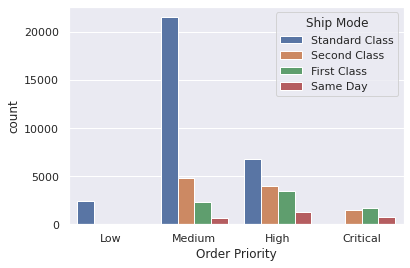

In [14]:
sns.countplot(x='Order Priority', hue='Ship Mode', order=['Low', 'Medium', 'High', 'Critical'], data=data)

- If the priority is low, the Standard Ship Mode is used
- If the priority is critical, Standard is not used
- For medium priority, Standard is used in most of the cases

### Customer ID and Customer Name

How many different customer do we have registered?

In [15]:
data['Customer ID'].nunique()

1590

In [16]:
data['Customer Name'].nunique()

795

In [17]:
n_customers = 4

list_random_customers = data['Customer Name'].sample(n_customers)

for cust in list_random_customers:
    print(cust, data[data['Customer Name'] == cust]['Customer ID'].unique(), sep=': ')

Justin Hirsh: ['JH-16180' 'JH-6180']
Lindsay Shagiari: ['LS-16975' 'LS-6975']
Muhammed Yedwab: ['MY-18295' 'MY-8295']
Julia West: ['JW-16075' 'JW-6075']


It seems that every customer has two Customer ID's. Let's see if I can find why...

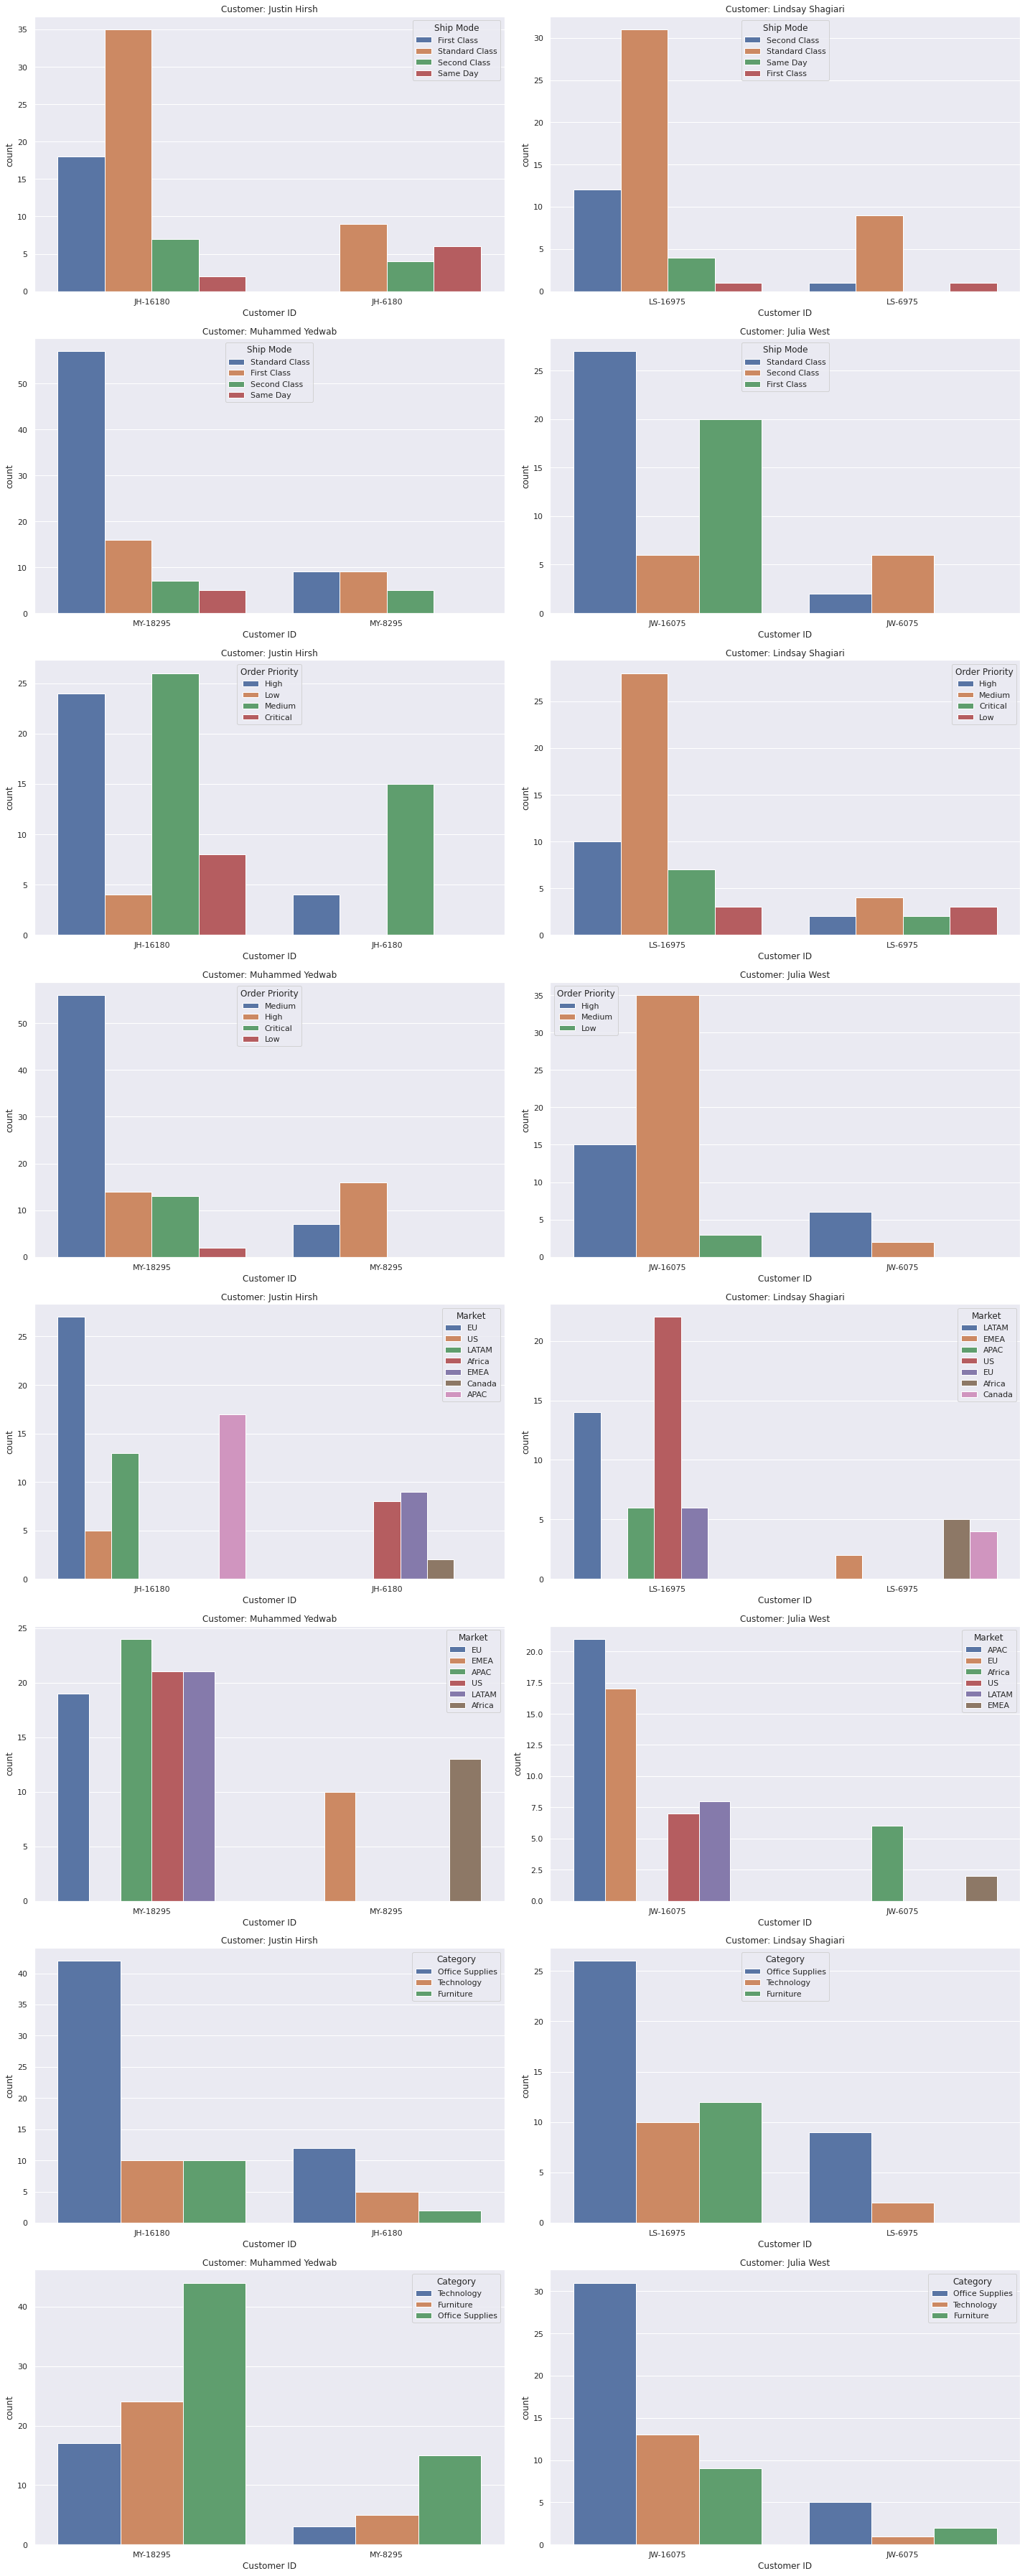

In [18]:
columns_to_compare = ['Ship Mode', 'Order Priority', 'Market', 'Category']

n_cols = 2
n_rows = int(np.ceil(len(columns_to_compare*n_customers)/ n_cols))

fig = plt.figure(figsize=(20, 50))

i= 0
for col in columns_to_compare:
    for cust in list_random_customers:
        i += 1
        ax = fig.add_subplot(n_rows, n_cols, i)
        sns.countplot(x='Customer ID', hue=col, data=data[data['Customer Name'] == cust])
        plt.title(f'Customer: {cust}')
        
plt.tight_layout()

I see a pattern in the Markets: the customers use one ID to buy in some markets, and another for the rest of the markets, but there is no pattern throughout the customers.

### Segment

What is Segment? Does it has something to do with the Customers? Or is it something related to the Products?

In [19]:
data['Segment'].unique()

array(['Consumer', 'Home Office', 'Corporate'], dtype=object)

Let's see how product categories are distributed throughout these segments:

<AxesSubplot:xlabel='Category', ylabel='count'>

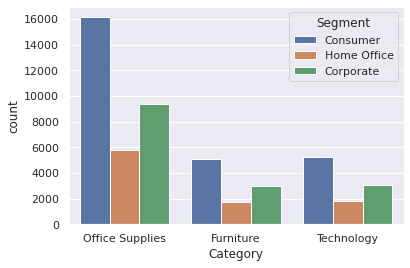

In [20]:
sns.countplot(x="Category", hue='Segment', data=data)

And now let's see how many Segments has each customer:

In [21]:
# count the number of segments by Customer ID, to check if Segment is a definition of the customer
# group by customer
customer_groupby = data.groupby('Customer ID')
# count the unique values of each column for each group
unique_values_per_customer = customer_groupby.nunique()
# check if any customer has more than 1 type of Segment 
customers_have_more_than_one_segment = unique_values_per_customer['Segment'] != 1
customers_have_more_than_one_segment.sum()

0

So Segment defines the segment of the customer, not the product

### City, State, Country, Postal Code, Market and Region

I want to know why are so many NaNs in the Postal Code column

<AxesSubplot:xlabel='Market', ylabel='count'>

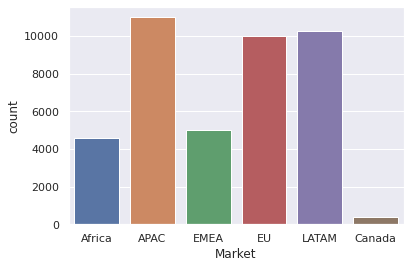

In [29]:
sns.countplot(x='Market', data=data[data['Postal Code'].isna()])

US Market is not present in this bar plot! This means that US orders all have Postal Code defined:

In [37]:
data[data['Postal Code'].notna()]['Market'].unique()

array(['US'], dtype=object)

What is the difference between Market and Region?

In [8]:
data['Market'].unique()

array(['Africa', 'APAC', 'EMEA', 'EU', 'US', 'LATAM', 'Canada'],
      dtype=object)

In [40]:
data['Region'].unique()

array(['Africa', 'Oceania', 'EMEA', 'North', 'Central Asia', 'West',
       'North Asia', 'Central', 'South', 'Canada', 'Southeast Asia',
       'East', 'Caribbean'], dtype=object)

- APAC means Asia-Pacific Countries
- EMEA stands for Europe, Middle East and Africa
- EU means European Union
- LATAM means Latin America

And those ambiguous regions: North, East...? They are applied to three Markets: EU, US and LATAM:

<AxesSubplot:xlabel='Market', ylabel='count'>

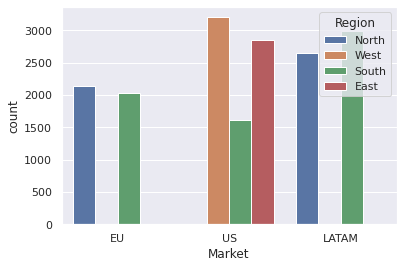

In [54]:
ambiguous_regions = data[(data['Region'] == 'North') | (data['Region'] == 'West') | (data['Region'] == 'South') | (data['Region'] == 'East')]
sns.countplot(x='Market', hue='Region', data=ambiguous_regions)

Why is Africa and EU in a category outside EMEA (Europe, Middle East and Africa)? And what's the difference between european countries in EMEA and those in EU?

In [79]:
market_groupby = data.groupby('Market')

for gr, mini_dataset in market_groupby:
    if gr in ['EMEA', 'Africa', 'EU']:
        print(gr)
        print(mini_dataset['Country'].unique())

Africa
['Algeria' 'Angola' 'Nigeria' 'Somalia' 'Sudan' 'Egypt'
 'Democratic Republic of the Congo' 'Kenya' 'Tanzania' 'Morocco'
 'Guinea-Bissau' 'Ghana' "Cote d'Ivoire" 'Madagascar' 'South Africa'
 'Burundi' 'Cameroon' 'Senegal' 'Liberia' 'Benin' 'Rwanda' 'Mozambique'
 'Guinea' 'Zambia' 'Uganda' 'Togo' 'Zimbabwe' 'Libya'
 'Republic of the Congo' 'Tunisia' 'Mali' 'Namibia' 'Sierra Leone' 'Gabon'
 'Mauritania' 'Niger' 'Djibouti' 'Equatorial Guinea' 'Eritrea' 'Ethiopia'
 'Central African Republic' 'Lesotho' 'Chad' 'Swaziland' 'South Sudan']
EMEA
['Hungary' 'Iran' 'Ukraine' 'Turkey' 'Poland' 'Slovakia' 'Saudi Arabia'
 'Albania' 'Iraq' 'Austria' 'Russia' 'Bosnia and Herzegovina' 'Romania'
 'Israel' 'Georgia' 'Kazakhstan' 'United Arab Emirates' 'Czech Republic'
 'Qatar' 'Bulgaria' 'Lebanon' 'Uzbekistan' 'Moldova' 'Azerbaijan'
 'Belarus' 'Lithuania' 'Turkmenistan' 'Yemen' 'Kyrgyzstan' 'Croatia'
 'Syria' 'Jordan' 'Mongolia' 'Slovenia' 'Tajikistan' 'Montenegro'
 'Armenia' 'Estonia' 'Bahrain' 'M

- It seems that EMEA holds all the European countries that are not in the EU. But there are some inconsistencies: Poland and Estonia appear in the EMEA group, but they are EU members, and Austria appers in both! **Austria should be in EU**
- Although EMEA stands for Europe, Middle East and Africa, there are no African countries in this Market

### Product ID, Product Name, Category and Sub-Category

We have 10292 Product IDs, but just 3788 Product Names. It seems that some groups of Product ID have the same Product Names. I don't know why this is happening (it could be just different IDs for different markets, or different versions of the product), so I'm going to use Product ID as the truth:

In [87]:
n_products = 4

list_random_products = data['Product Name'].sample(n_products)

for prod in list_random_products:
    print(prod, data[data['Product Name'] == prod]['Product ID'].unique(), sep=': ')

Office Star Rocking Chair, Red: ['FUR-CH-10002830' 'FUR-CH-10004913' 'FUR-OFF-10002395' 'FUR-CH-10002410'
 'FUR-CH-10001021']
Xerox Parchment Paper, Premium: ['OFF-PA-10000116' 'OFF-PA-10000362' 'OFF-XER-10004042' 'OFF-PA-10003920']
Acco Binding Machine, Clear: ['OFF-ACC-10000102' 'OFF-BI-10000328' 'OFF-BI-10000538' 'OFF-BI-10003934'
 'OFF-BI-10001089' 'OFF-BI-10002711']
Sanford Pencil Sharpener, Water Color: ['OFF-AR-10000980' 'OFF-AR-10002486' 'OFF-AR-10000584' 'OFF-SAN-10004824'
 'OFF-SAN-10001295' 'OFF-AR-10004010' 'OFF-AR-10004218' 'OFF-AR-10000054']


Let's see also how Categories and Sub-Categories are distributed:

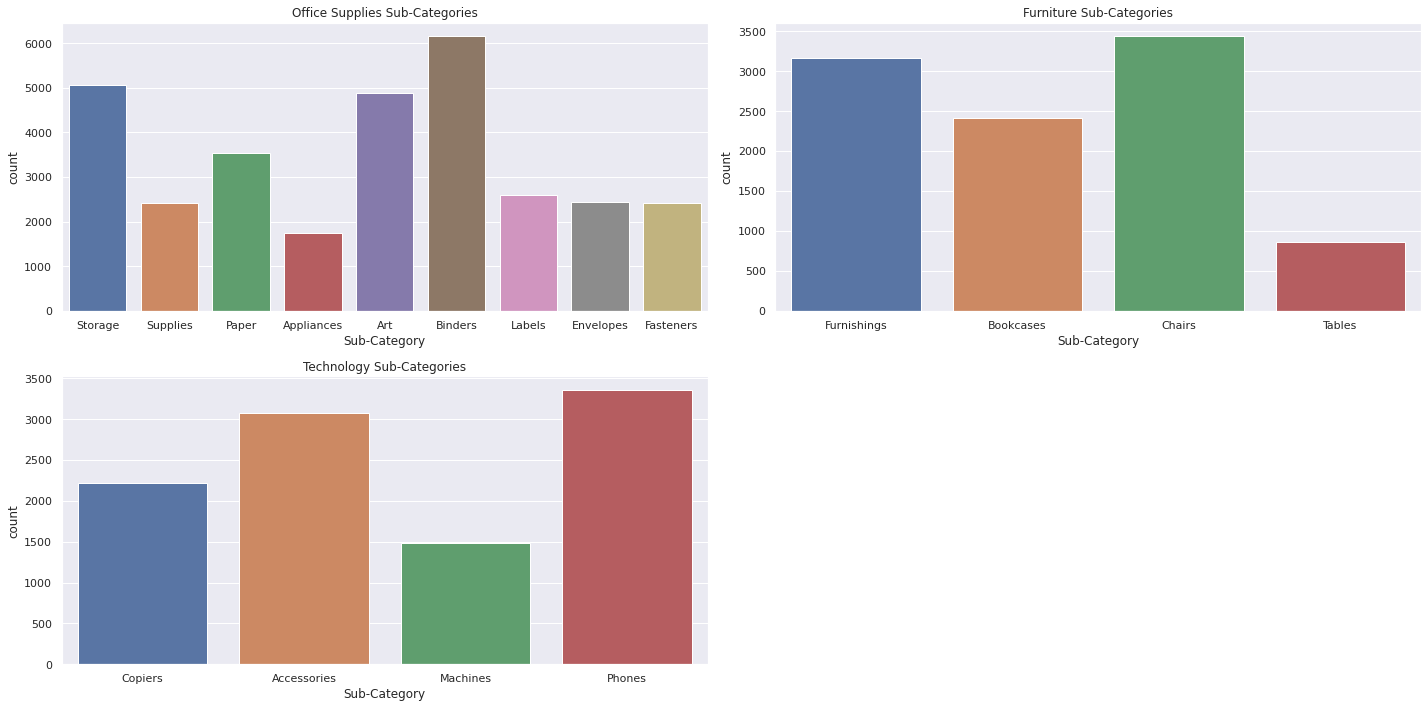

In [126]:
categories = data['Category'].unique()

n_rows = 2
n_cols = 2

fig = plt.figure(figsize=(20, 10))

for i, categ in enumerate(categories):
    ax = fig.add_subplot(n_rows, n_cols, i+1)
    sns.countplot(x='Sub-Category', orient='h', data=data[data['Category'] == categ])
    plt.title(f'{categ} Sub-Categories')

plt.tight_layout()

### Sales, Quantity, Profit, Discount and Shipping Cost

Sales and Profit seem to be the obvious: the amount spent in the product purchase and the profit obtained from it.

There are negative profits!

In [137]:
data[['Sales', 'Profit']].sample(10)

,Sales,Profit
8108,153.420,-52.260
31846,1285.440,449.880
42231,46.920,17.340
34966,504.090,85.680
27111,31.536,-41.064
40189,268.200,67.050
32409,351.900,28.140
26794,33.420,10.980
32084,2042.544,255.234
14340,235.332,-251.028


These are sales and profit for each product in the order; are there negative profits for some orders?

In [150]:
data.groupby('Order ID').sum()['Profit'].sample(10)

Order ID
CA-2013-152247     100.1960
CA-2011-127866     185.3866
MX-2012-107601      76.3800
IN-2011-34751      103.6800
US-2014-112172      -0.0160
ES-2012-5543011      4.3200
MX-2011-120397      26.0800
IT-2011-4060327   -191.1600
MX-2012-117898     114.6000
ID-2013-59566      -53.1408
Name: Profit, dtype: float64

Quantity is the number of items purchased. The customers usually buy individual items or in groups of two or three:

<AxesSubplot:xlabel='Quantity', ylabel='count'>

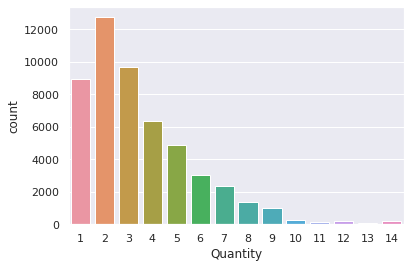

In [151]:
sns.countplot(x='Quantity', data=data)

Discount is the fraction of the cost that is discounted. Most of the purchases doesn't have a discount:

<AxesSubplot:>

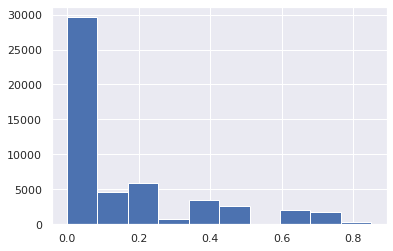

In [156]:
data['Discount'].hist()

Most of the purchases have near-zero Shipping Cost, but some are really expensive:

<AxesSubplot:>

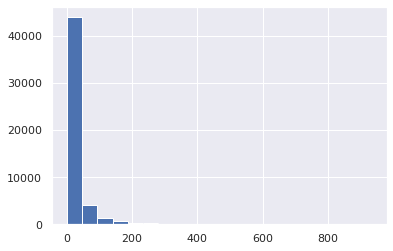

In [165]:
data['Shipping Cost'].hist(bins=20)

Is the shipping cost one for each order, or is the Shipping Cost added to each Product individually?

In [172]:
data.groupby('Order ID').nunique()[['Product ID', 'Shipping Cost']].sample(5)

,Product ID,Shipping Cost
Order ID,,
ES-2012-3710236,2,2
ZI-2014-4230,1,1
ES-2012-3247635,2,2
ES-2013-3895853,1,1
ID-2011-38832,2,2


It seems that each product has its own Shipping Cost. Let's see an example:

In [170]:
data[data['Order ID'] == 'AE-2014-3830'][['Order ID', 'Product ID', 'Shipping Cost']]

,Order ID,Product ID,Shipping Cost
21825,AE-2014-3830,TEC-MOT-10001535,6.73
21830,AE-2014-3830,OFF-ELD-10002297,5.83
21834,AE-2014-3830,OFF-BIC-10002270,4.08
21838,AE-2014-3830,OFF-ROG-10003993,2.24
21848,AE-2014-3830,OFF-AVE-10000357,0.25
21849,AE-2014-3830,OFF-AVE-10004827,0.25


### Summary
- There are less Order ID's than rows in the dataset. This is because an order may have multiple products
- The Order Date has different formats for the dates. After cleaning, the range is:
    - For Order Date: 2011-01-01 to 2014-12-31
    - For Ship Date: 2011-01-02 to 2015-07-01
- Orders with higher Order Priority mostly use faster Ship Modes, and vice-versa.
- The Segment classes are customer segments: 'Consumer', 'Home Office' and 'Corporate'.
- There are 795 unique customers (Customer Name), but each of them has two Customer ID
    - They use one customer ID to buy from some Markets, and the other ID to buy from other.
- There are no NaN's except for the Postal Code (because there are no postal codes recorded for orders from outside US)
- The orders are segmented into 7 markets: Africa, APAC (Asia-Pacific), EMEA (Europe-Middle East-Africa), EU (European Union), US (United States), LATAM (Latin America), Canada.
- EMEA holds the European countries that are not in the EU
    - but, unexpectedly, Poland and Estonia are stored as EMEA countries.
    - Austria is listed in EU countries and EMEA countries. I think I should fix that.
- There are more Product IDs than product names. I don't know the reason (it could be that the version of the product is different), so I'll use Product ID as ground truth.
- The dataset has three Categories for the products: Furniture, Office Supplies and Technology. There are also 17 Sub-Categories.
- The Profit can be negative
- The Discount is stored as a fraction of the amount purchased.
- Customers usually buy products in groups of 1, 2 or three.
- The Shipping Costs are usually near to zero, but there are some purchases with big Shipping Costs

# Questions I want to answer:
- Define a new segmentation for the customers. I find that the 3 Segments that are defined in the dataset are not very descriptive. Method:
    - Select most characterizing features.
    - Define a variable that holds the evolution in time of the expenditure of each customer.
- Does this new clustering improves the 3-classes segmentation? Ways to measure the improvement.
- Can I predict sales of specific product categories?
- Geospatial D¡distribution of customers, sales, categories, shipping cost...

# Data Cleaning

## Austria in EU

In [28]:
data.loc[data['Country'] == 'Austria', 'Market'] = 'EU'

## Unify date format

In [29]:
date_columns = ['Order Date', 'Ship Date']
for col in date_columns:
    data.loc[:, col] = pd.to_datetime(data[col])